# Exploratory Analysis

* $RQ_1$: How does temporal proximity affect sharing behaviour during protest demonstrations?
* $RQ_2$: How do source attributes like the poster's gender affect sharing behaviour during protest demonstrations?


In [2]:
library(lme4)
library(AER)
library(dplyr)
library(purrr)
library(magrittr)
library(ggplot2)
require(GGally)
require(reshape2)
require(compiler)
require(parallel)
require(boot)
require(lattice)

data <- read.csv("../../data/processed/607d6b3929befce813fe5ba2-rumour-results.csv")
data$reshared <- as.integer(as.logical(data$reshared))
head(data)

,user_id,condition,timeSubmitted,secondsTaken,id,rumour,code,evidence,warning,reshared,clickedWarning,timestamp,mockGender
,<dbl>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>
1,7.057603e+18,treatment,2021-05-24 10:57:41.980000+00:00,120,1.283487e+18,R1,denies,high,True,1,False,2,female
2,7.057603e+18,treatment,2021-05-24 10:57:41.980000+00:00,120,1.284272e+18,R1,neutral,high,False,0,False,2,female
3,7.057603e+18,treatment,2021-05-24 10:57:41.980000+00:00,120,1.283527e+18,R1,questions,high,False,1,False,4,female
4,7.057603e+18,treatment,2021-05-24 10:57:41.980000+00:00,120,1.283565e+18,R1,denies,high,True,1,True,5,female
5,7.057603e+18,treatment,2021-05-24 10:57:41.980000+00:00,120,1.283799e+18,R1,questions,high,False,0,False,6,male
6,7.057603e+18,treatment,2021-05-24 10:57:41.980000+00:00,120,1.283523e+18,R1,affirms,high,False,1,False,7,male


In [18]:
treat <- filter(data, condition == "treatment")
head(treat)

,user_id,condition,timeSubmitted,secondsTaken,id,rumour,code,evidence,warning,reshared,clickedWarning,timestamp,mockGender
,<dbl>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>
1,7.057603e+18,treatment,2021-05-24 10:57:41.980000+00:00,120,1.283487e+18,R1,denies,high,True,1,False,2,female
2,7.057603e+18,treatment,2021-05-24 10:57:41.980000+00:00,120,1.284272e+18,R1,neutral,high,False,0,False,2,female
3,7.057603e+18,treatment,2021-05-24 10:57:41.980000+00:00,120,1.283527e+18,R1,questions,high,False,1,False,4,female
4,7.057603e+18,treatment,2021-05-24 10:57:41.980000+00:00,120,1.283565e+18,R1,denies,high,True,1,True,5,female
5,7.057603e+18,treatment,2021-05-24 10:57:41.980000+00:00,120,1.283799e+18,R1,questions,high,False,0,False,6,male
6,7.057603e+18,treatment,2021-05-24 10:57:41.980000+00:00,120,1.283523e+18,R1,affirms,high,False,1,False,7,male


In [27]:
# md <- lmer(Affirms ~ condition * evidence + (1 | user_id), data = data)
md <- glmer(reshared ~ mockGender + timestamp + warning + code * evidence + (1 | user_id) + (1 |id),
            data = treat,
            family = binomial )
summary(md)

Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“unable to evaluate scaled gradient”
Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge: degenerate  Hessian with 1 negative eigenvalues”
Warning message in vcov.merMod(object, use.hessian = use.hessian):
“variance-covariance matrix computed from finite-difference Hessian is
not positive definite or contains NA values: falling back to var-cov estimated from RX”
Warning message in vcov.merMod(object, correlation = correlation, sigm = sig):
“variance-covariance matrix computed from finite-difference Hessian is
not positive definite or contains NA values: falling back to var-cov estimated from RX”


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: reshared ~ mockGender + timestamp + warning + code * evidence +  
    (1 | user_id) + (1 | id)
   Data: treat

     AIC      BIC   logLik deviance df.resid 
   151.2    191.8    -62.6    125.2      155 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.2666 -0.4145 -0.2702 -0.0004  3.6941 

Random effects:
 Groups  Name        Variance  Std.Dev. 
 id      (Intercept) 1.119e-08 0.0001058
 user_id (Intercept) 6.938e-01 0.8329647
Number of obs: 168, groups:  id, 108; user_id, 3

Fixed effects:
                            Estimate Std. Error z value Pr(>|z|)   
(Intercept)                 -0.03279    0.82025  -0.040   0.9681   
mockGendermale              -0.38724    0.48002  -0.807   0.4198   
timestamp                   -0.04596    0.01465  -3.138   0.0017 **
warningTrue                 -0.70784    1.08362  -0.653   0.5136   
codedenies        

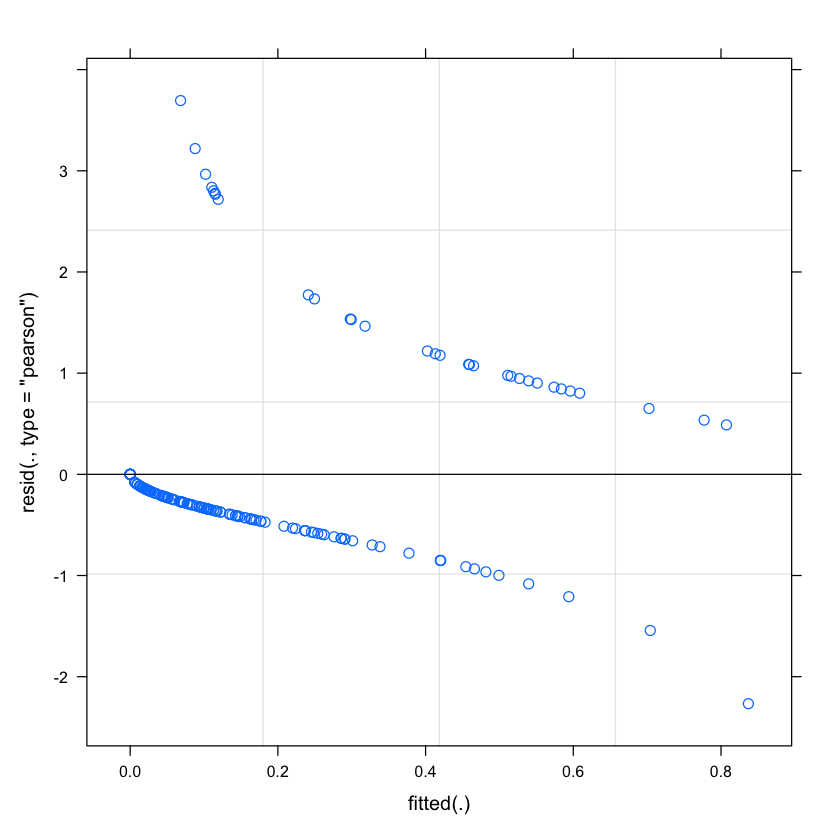

In [28]:
plot(md)  # looks alright, no patterns evident

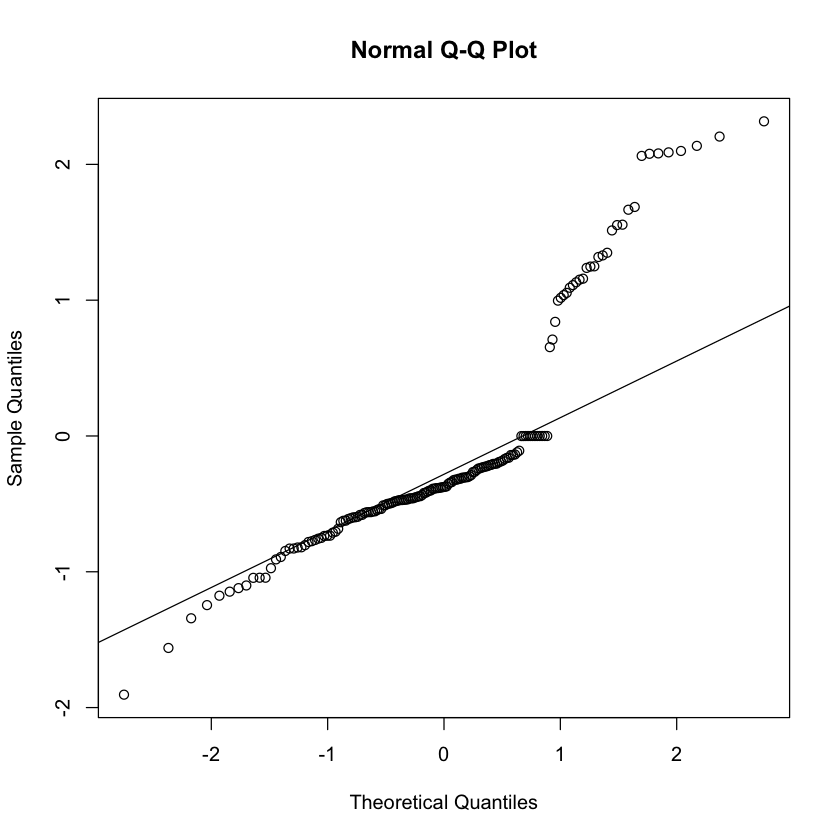

In [29]:
qqnorm(resid(md))
qqline(resid(md))  # points fall nicely onto the line - good!

In [10]:
se <- sqrt(diag(vcov(md)))
# table of estimates with 95% CI
(tab <- cbind(Est = fixef(md), LL = fixefmdm) - 1.96 * se, UL = fixef(md) + 1.96 *
    se)
se

ERROR: Error in parse(text = x, srcfile = src): <text>:3:58: unexpected ','
2: # table of estimates with 95% CI
3: (tab <- cbind(Est = fixef(md), LL = fixefmdm) - 1.96 * se,
                                                            ^
